<a href="https://colab.research.google.com/github/smartin9111/ML_technik/blob/main/cubix_ml_engineer_ml_algorithms_4week_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Előfeldolgozás, importok, adat tisztítás!

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Titanic dataset betöltése a seaborn könyvtárból
titanic = sns.load_dataset('titanic')

# Ellenőrizzük az oszlopok neveit
print("Oszlopok nevei az adatbetöltés után:")
print(titanic.columns)

# Hiányzó értékek kezelése
titanic.dropna(subset=['embarked', 'age', 'fare'], inplace=True)

# Kategóriás oszlopok kiválasztása
categorical_cols = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone']

# Kategóriák numerikus átalakítása OneHotEncoder segítségével
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(titanic[categorical_cols])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_cols))

# Az eredeti DataFrame és az újonnan létrehozott oszlopok egyesítése
titanic.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
titanic = pd.concat([titanic.drop(columns=categorical_cols), encoded_df], axis=1)

# Ellenőrizzük az oszlopok számát és neveit
print("Oszlopok nevei az átalakítás után:")
print(titanic.columns)

# Oszlopok átnevezése
list_column_names = ["V" + str(i) for i in range(1, len(titanic.columns) + 1)]
titanic.columns = list_column_names

# Ellenőrizzük az átalakított adatokat
print("Átalakított adatok:")
print(titanic.head())

# Célváltozó és bemeneti adatok definiálása
y = titanic["V25"]  # Feltételezve, hogy a célváltozó az 'survived', amely most "V1"
X = titanic.drop(columns="V25")

# Adatok szétválasztása
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



Oszlopok nevei az adatbetöltés után:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Oszlopok nevei az átalakítás után:
Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'sex_male', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third',
       'who_man', 'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E',
       'deck_F', 'deck_G', 'deck_nan', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_yes', 'alone_True'],
      dtype='object')
Átalakított adatok:
   V1  V2    V3  V4  V5       V6     V7   V8   V9  V10  ...  V16  V17  V18  \
0   0   3  22.0   1   0   7.2500   True  1.0  0.0  1.0  ...  0.0  0.0  0.0   
1   1   1  38.0   1   0  71.2833  False  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2   1   3  26.0   0   0   7.9250  False  0.0  0.0  1.0  ...  0.0  0.0  0.0   
3   1   1  35.0   1   0  53.1000 

KNN
- from sklearn.neighbors import KNeighborsClassifier

Advantages: Simple, few parameters, fast prototyping

Disadvantages: Slow running for large datasets and many features

In [2]:
# KNN Modell betanítása
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [3]:
y_train_pred = neigh.predict(X_train)

data prediction on train

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9161425576519916

data prediction on test



In [5]:
y_test_pred = neigh.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8297872340425532

In [6]:
print(np.array(y_test.to_list()[0:20], dtype=int))
print(np.array(y_test_pred[0:20], dtype=int))

[0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0]
[0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0]


In [7]:
# dot product example with numpy

u = np.array([2, 3, 4])
v = np.array([5, 1, 2])

dot_product = np.dot(u, v)

print("Dot product:", dot_product)

Dot product: 21


Gradient descent

In [8]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Titanic dataset betöltése a seaborn könyvtárból
titanic = sns.load_dataset('titanic')

# Hiányzó értékek kezelése
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['embarked'].fillna('S', inplace=True)
titanic.drop(columns=['deck'], inplace=True)

# Kategóriás oszlopok kiválasztása
categorical_cols = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive', 'alone']

# Kategóriák numerikus átalakítása OneHotEncoder segítségével
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(titanic[categorical_cols])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_cols))

# Az eredeti DataFrame és az újonnan létrehozott oszlopok egyesítése
titanic.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
titanic = pd.concat([titanic.drop(columns=categorical_cols), encoded_df], axis=1)

# Célváltozó és bemeneti adatok definiálása
y = titanic["survived"]
X = titanic.drop(columns="survived")

# Adatok szétválasztása tanító és teszt halmazokra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logisztikus regresszió modell betanítása
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Előrejelzések készítése a teszt halmazon
y_pred = model.predict(X_test)

# Pontosság kiértékelése
accuracy = accuracy_score(y_test, y_pred)
print("Pontosság:", accuracy)

# Az első néhány sor megtekintése az átalakított DataFrame-ből
print(titanic.head())



Pontosság: 1.0
   survived  pclass   age  sibsp  parch     fare  adult_male  sex_male  \
0         0       3  22.0      1      0   7.2500        True       1.0   
1         1       1  38.0      1      0  71.2833       False       0.0   
2         1       3  26.0      0      0   7.9250       False       0.0   
3         1       1  35.0      1      0  53.1000       False       0.0   
4         0       3  35.0      0      0   8.0500        True       1.0   

   embarked_Q  embarked_S  class_Second  class_Third  who_man  who_woman  \
0         0.0         1.0           0.0          1.0      1.0        0.0   
1         0.0         0.0           0.0          0.0      0.0        1.0   
2         0.0         1.0           0.0          1.0      0.0        1.0   
3         0.0         1.0           0.0          0.0      0.0        1.0   
4         0.0         1.0           0.0          1.0      1.0        0.0   

   embark_town_Queenstown  embark_town_Southampton  embark_town_nan  \
0           

In [9]:
print(titanic)

     survived  pclass        age  sibsp  parch     fare  adult_male  sex_male  \
0           0       3  22.000000      1      0   7.2500        True       1.0   
1           1       1  38.000000      1      0  71.2833       False       0.0   
2           1       3  26.000000      0      0   7.9250       False       0.0   
3           1       1  35.000000      1      0  53.1000       False       0.0   
4           0       3  35.000000      0      0   8.0500        True       1.0   
..        ...     ...        ...    ...    ...      ...         ...       ...   
886         0       2  27.000000      0      0  13.0000        True       1.0   
887         1       1  19.000000      0      0  30.0000       False       0.0   
888         0       3  29.699118      1      2  23.4500       False       0.0   
889         1       1  26.000000      0      0  30.0000        True       1.0   
890         0       3  32.000000      0      0   7.7500        True       1.0   

     embarked_Q  embarked_S

In [10]:
titanic.drop(columns=["survived"]).max().max()

512.3292

In [11]:
X = titanic.drop(columns=["survived"])

In [12]:
from sklearn.preprocessing import MinMaxScaler

y_orig = titanic["survived"].values.reshape(-1, 1)

scaler = MinMaxScaler()
y = scaler.fit_transform(y_orig)

In [13]:
X

,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_yes,alone_True
0,3,22.000000,1,0,7.2500,True,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,38.000000,1,0,71.2833,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,26.000000,0,0,7.9250,False,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,1,35.000000,1,0,53.1000,False,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,3,35.000000,0,0,8.0500,True,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,True,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1,19.000000,0,0,30.0000,False,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
888,3,29.699118,1,2,23.4500,False,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
889,1,26.000000,0,0,30.0000,True,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [14]:
# Célváltozó és bemeneti adatok definiálása
y = titanic["survived"]
X = titanic.drop(columns="survived")

# Ellenőrizzük az X és y méreteit
print("X mérete:", X.shape)
print("y mérete:", y.shape)

# Adatok szétválasztása
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


X mérete: (891, 18)
y mérete: (891,)


In [15]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

print("Model coefficients:", linear_reg_model.coef_)
print("Intercept:", linear_reg_model.intercept_)

from sklearn.metrics import mean_absolute_error

y_pred = linear_reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Model coefficients: [-1.07654541e-16 -3.46944695e-18 -3.44641516e-16 -2.33001087e-16
  1.74478440e-19 -4.70470200e-16 -2.49420046e-16  1.21152283e-18
  3.38101037e-16  3.32045471e-16 -9.67746310e-17 -1.79036656e-16
 -4.21401731e-17 -1.27158014e-16 -3.09493802e-16  6.32978640e-16
  1.00000000e+00 -5.81042579e-16]
Intercept: 1.7763568394002505e-15
Mean Absolute Error (MAE): 3.54838234148432e-16


In [16]:
linear_reg_model.coef_

array([-1.07654541e-16, -3.46944695e-18, -3.44641516e-16, -2.33001087e-16,
        1.74478440e-19, -4.70470200e-16, -2.49420046e-16,  1.21152283e-18,
        3.38101037e-16,  3.32045471e-16, -9.67746310e-17, -1.79036656e-16,
       -4.21401731e-17, -1.27158014e-16, -3.09493802e-16,  6.32978640e-16,
        1.00000000e+00, -5.81042579e-16])

In [17]:
X_train

,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_yes,alone_True
6,1,54.000000,0,0,51.8625,True,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
718,3,29.699118,0,0,15.5000,True,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
685,2,25.000000,1,2,41.5792,True,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73,3,26.000000,1,0,14.4542,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
882,3,22.000000,0,0,10.5167,False,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,False,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
270,1,29.699118,0,0,31.0000,True,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
860,3,41.000000,2,0,14.1083,True,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
435,1,14.000000,1,2,120.0000,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Prototype with Ridge


In [18]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("Model coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)

print("Mean Absolute Error (MAE) with Ridge: ", mae_ridge)

Model coefficients: [-9.05873555e-05 -1.52104143e-06 -7.99603848e-05 -6.83999433e-05
  9.10791010e-07 -2.81102362e-04 -3.62514642e-05 -3.74288729e-05
 -3.50182018e-05  5.95706302e-05 -7.50789939e-05 -2.81102362e-04
  6.50223842e-05 -3.74288729e-05 -9.56119717e-05  6.05937696e-05
  9.98786628e-01 -9.15635849e-05]
Intercept: 0.001283802171055115
Mean Absolute Error (MAE) with Ridge:  0.0003333074123683748


# Lasso

In [19]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Model coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("Mean Absolute Error (MAE) with Lasso: ", mae_lasso)

Model coefficients: [-0.00000000e+00 -7.09464700e-06 -0.00000000e+00  0.00000000e+00
  9.88997551e-06 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  9.95461500e-01 -0.00000000e+00]
Intercept: 0.0015846180856380343
Mean Absolute Error (MAE) with Lasso:  0.0020182698234329013


# Ridge, Lasso and ElasticNet cost functions

In [20]:
import plotly.figure_factory as ff

table_data = [
    ['Algorithm', 'Cost Function', 'Regularization'],
    ['Ridge regression', r'$J(\theta) = \text{MSE} + \alpha \sum \theta_i^2$', 'L2'],
    ['Lasso regression', r'$J(\theta) = \text{MSE} + \alpha \sum |\theta_i|$', 'L1'],
    ['Elastic Net regression', r'$J(\theta) = \text{MSE} + \frac{\alpha}{2} (1 - r) \sum \theta_i^2 + \alpha \left( r \sum |\theta_i| \right)$', 'L1 and L2']
]

table = ff.create_table(table_data)

table.show()

# Logistic Regression for binary classification

It is very similar to Linear Regression, but is used for classification.


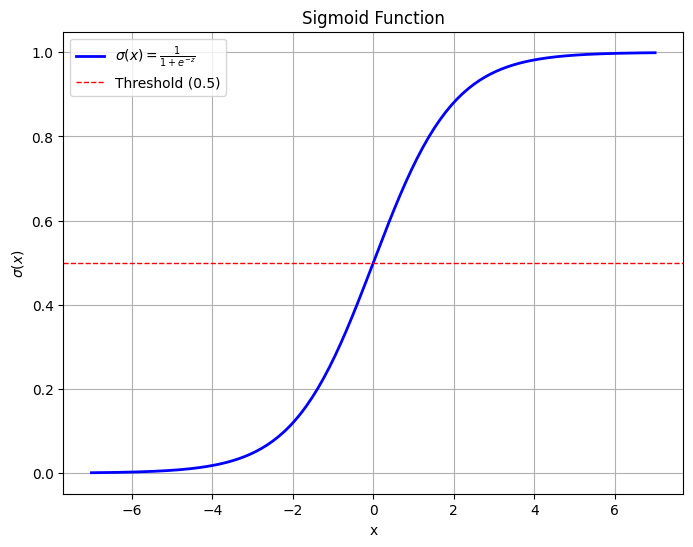

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-7, 7, 200)

y_values = sigmoid(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r'$\sigma(x) = \frac{1}{1 + e^{-z}}$', color='blue', linewidth=2)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$')
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='Threshold (0.5)')
plt.legend()
plt.grid(True)
plt.show()


Advantages:
- output between 0 and 1
- easy interpretation
- easy and fast calculation
- the gradient of the sigmoid function does not become too large or too small, except for very large or very small input values

# Logistic regression for multiclass classification

## Softmax

In [22]:
# Titanic dataset betöltése a seaborn könyvtárból
titanic = sns.load_dataset('titanic')

# Ellenőrizzük az oszlopok neveit
print("Oszlopok nevei az adatbetöltés után:")
print(titanic.columns)

# Hiányzó értékek kezelése
titanic.dropna(subset=['embarked', 'age', 'fare'], inplace=True)

# Kategóriás oszlopok kiválasztása
categorical_cols = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone']

# Kategóriák numerikus átalakítása OneHotEncoder segítségével
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(titanic[categorical_cols])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_cols))

# Az eredeti DataFrame és az újonnan létrehozott oszlopok egyesítése
titanic.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
titanic = pd.concat([titanic.drop(columns=categorical_cols), encoded_df], axis=1)

# Ellenőrizzük az oszlopok számát és neveit
print("Oszlopok nevei az átalakítás után:")
print(titanic.columns)

# Oszlopok átnevezése
list_column_names = ["V" + str(i) for i in range(1, len(titanic.columns) + 1)]
titanic.columns = list_column_names

# Ellenőrizzük az átalakított adatokat
print("Átalakított adatok:")
print(titanic.head())

# Célváltozó és bemeneti adatok definiálása
y = titanic["V25"]
X = titanic.drop(columns="V25")

# Adatok szétválasztása
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


Oszlopok nevei az adatbetöltés után:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Oszlopok nevei az átalakítás után:
Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'sex_male', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third',
       'who_man', 'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E',
       'deck_F', 'deck_G', 'deck_nan', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_yes', 'alone_True'],
      dtype='object')
Átalakított adatok:
   V1  V2    V3  V4  V5       V6     V7   V8   V9  V10  ...  V16  V17  V18  \
0   0   3  22.0   1   0   7.2500   True  1.0  0.0  1.0  ...  0.0  0.0  0.0   
1   1   1  38.0   1   0  71.2833  False  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2   1   3  26.0   0   0   7.9250  False  0.0  0.0  1.0  ...  0.0  0.0  0.0   
3   1   1  35.0   1   0  53.1000 

In [23]:
y = titanic["V25"]
X = titanic.drop(columns="V25")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
titanic

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,0,3,22.0,1,0,7.2500,True,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,38.0,1,0,71.2833,False,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,False,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,1,1,35.0,1,0,53.1000,False,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,True,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,39.0,0,5,29.1250,False,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
708,0,2,27.0,0,0,13.0000,True,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
709,1,1,19.0,0,0,30.0000,False,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
710,1,1,26.0,0,0,30.0000,True,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [25]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

y_train_pred = logreg_model.predict(X_train)

y_test_pred = logreg_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 1.0


azért ez a kicsit gyanús

# Support Vector Machines

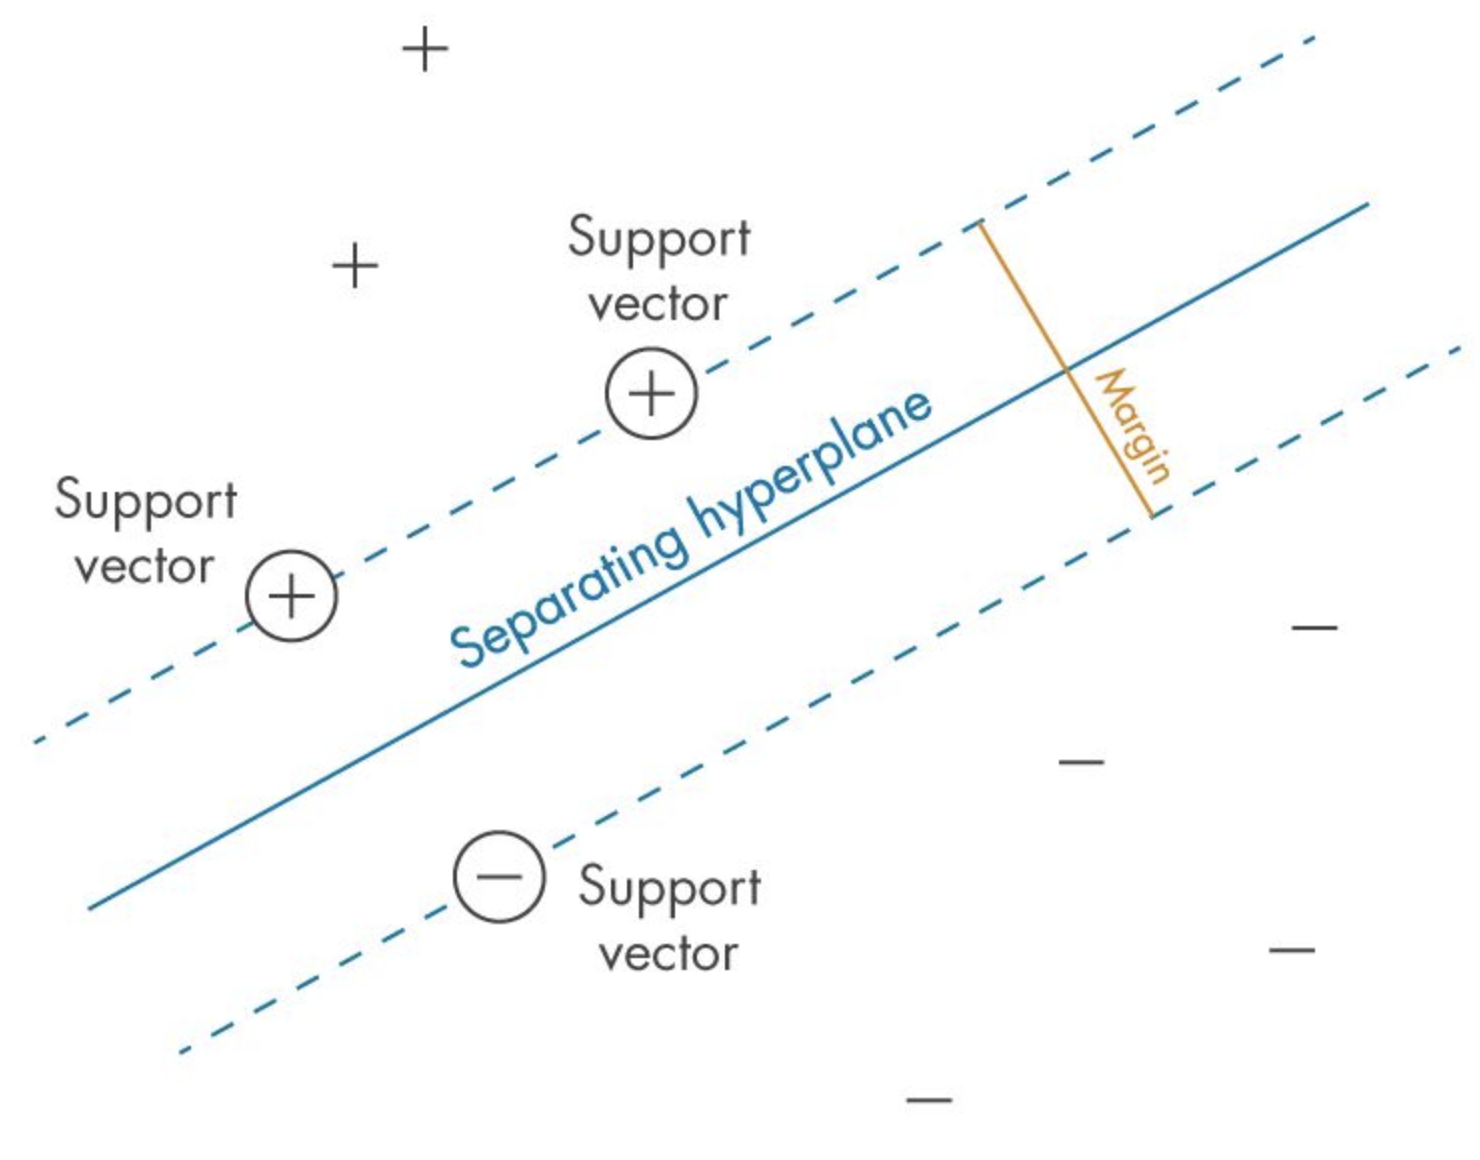

In [26]:
def get_accuracy(model, X_train, X_test, y_train, y_test):
  y_train_pred = model.predict(X_train)

  y_test_pred = model.predict(X_test)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  print("Train Accuracy:", train_accuracy)
  print("Test Accuracy:", test_accuracy)

In [27]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=2) # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
svm.fit(X_train, y_train)


SVC(C=2)

In [28]:
get_accuracy(svm, X_train, X_test, y_train, y_test)

Train Accuracy: 0.8134171907756813
Test Accuracy: 0.7872340425531915


# Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_clf = DecisionTreeClassifier(max_depth=3)
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
get_accuracy(decision_tree_clf, X_train, X_test, y_train, y_test)

Train Accuracy: 1.0
Test Accuracy: 1.0


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
rf.fit(X_train, y_train)
get_accuracy(rf, X_train, X_test, y_train, y_test)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [32]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
493,0,1,61.0,0,0,32.3208,True,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
371,0,3,38.0,0,0,7.0500,True,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
319,0,2,23.0,0,0,10.5000,True,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
479,1,2,22.0,1,2,41.5792,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79,0,3,33.0,0,0,8.6542,True,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,3,26.0,1,2,20.5750,True,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
106,0,2,23.0,0,0,15.0458,True,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
270,1,3,45.0,0,0,8.0500,True,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
435,1,2,8.0,1,1,36.7500,False,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


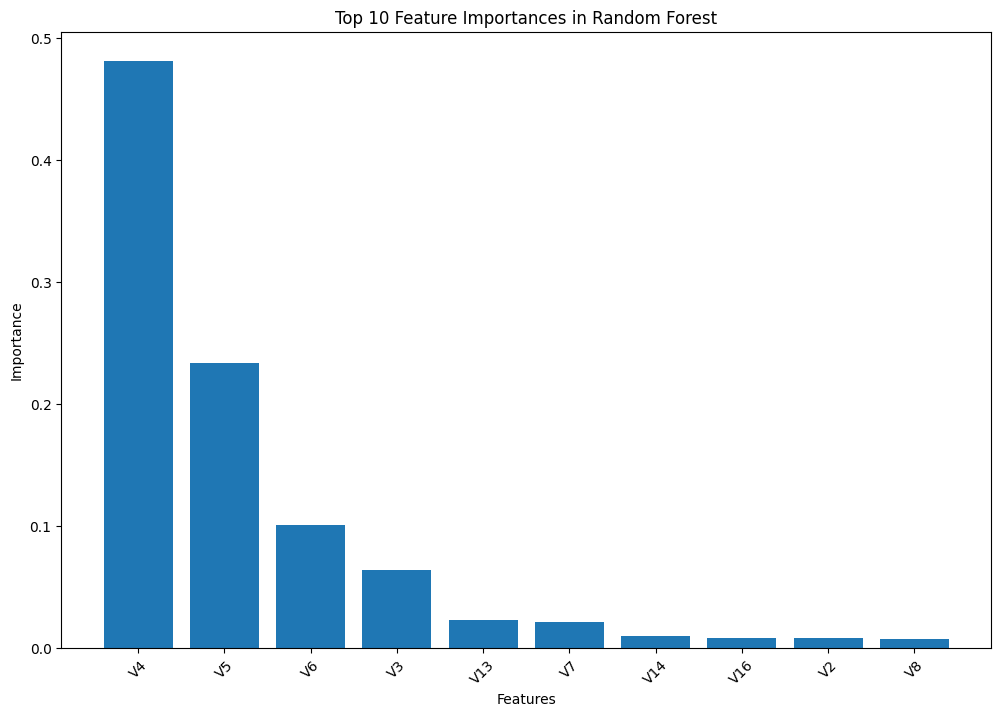

In [33]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf.feature_importances_
feature_names = X_train.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = np.array(feature_importances)[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

top_n = 10
top_n_indices = sorted_indices[:top_n]
top_n_feature_importances = sorted_feature_importances[:top_n]
top_n_feature_names = sorted_feature_names[:top_n]

plt.figure(figsize=(12, 8))
plt.title("Top 10 Feature Importances in Random Forest")
plt.bar(top_n_feature_names, top_n_feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


## Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=2, n_estimators=300, learning_rate=0.2)
gbc.fit(X_train, y_train)

get_accuracy(gbc, X_train, X_test, y_train, y_test)

Train Accuracy: 1.0
Test Accuracy: 1.0


## AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab.fit(X_train, y_train)
get_accuracy(ab, X_train, X_test, y_train, y_test)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [36]:
! pip install xgboost

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=4, n_estimators=10)
xgb.fit(X_train, y_train)

get_accuracy(xgb, X_train, X_test, y_train, y_test)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [ ]:
! pip install lightgbm

In [38]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(max_depth=4, n_estimators=50)
lgbm.fit(X_train, y_train)

get_accuracy(lgbm, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 281, number of negative: 196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 477, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.589099 -> initscore=0.360240
[LightGBM] [Info] Start training from score 0.360240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

# CatBoost

In [40]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.8 MB/s eta 0:00:00


In [41]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier(max_depth=7, n_estimators=5, verbose=0)
catboost.fit(X_train, y_train)

get_accuracy(catboost, X_train, X_test, y_train, y_test)

Train Accuracy: 1.0
Test Accuracy: 1.0
